## Лабораторная работа №9 (Ким Д.В., группа БПМ-151)
### Вариант 13

In [18]:
import numpy as np
from sympy import *
import math

%matplotlib inline

In [19]:
from sympy.plotting import plot

In [20]:
import time
from tqdm import tqdm_notebook

### Задача 9.1

Методом Ньютона найти минимум и максимум унимодальной на отрезке $[a, \;b]$ функции $f(x)$ с точностью $\varepsilon=10^{-6}$. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.

$$\boldsymbol{f(x)} = e^x-\ln{x}$$
$$\boldsymbol{a}=0.1\;\;\;\boldsymbol{b}=2$$

Зададим функцию, реализующую поиск экстремума.<br/>
Итерационнай шаг преобразован с использованием второй производной, т.е. мы просто пользуемся поиском корня производной методом Ньютона.

In [21]:
def newton(xstart, fun, eps, a, b):
    pbar = tqdm_notebook(total = 100) # будем считать итерации
    x0 = xstart
    xi = x0 - diff(fun, x).evalf(subs={x:x0})/diff(diff(fun, x),x).evalf(subs={x:x0}) # символьное дифференцирование 
                                                                                      # и вычисление функции в точке
    while abs(xi - x0) > eps:
        pbar.update(1) # добавляем итерацию
        x0 = xi
        # if (x0<a or x0>b):
           # print("Скорее всего, метод расходится.")
           # return x0
        xi = x0 - diff(fun, x).evalf(subs={x:x0})/diff(diff(fun, x), x).evalf(subs={x:x0})
    return float(xi)

Зададим функцию $f(x)$, точность $\varepsilon$ и отрезок локализации $[a,\;b]$.

In [22]:
x = Symbol('x')
f1 = exp(x) - log(x) #для символьного дифференцирования в методе Ньютона
a = 0.1
b = 2
eps = 1e-6

Графики функции и ее первой производной. Видим, что после корня, близкого к $0.5$ производная монотонно возрастает.

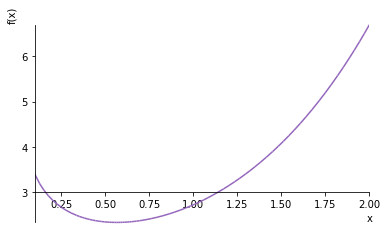

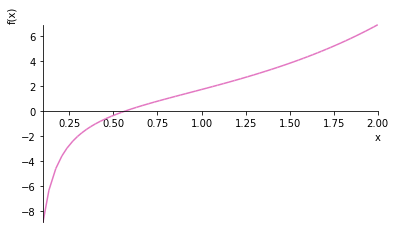

In [23]:
plot(f1, (x, 1e-1, 2), axis_center=(1e-1, 3), line_color='tab:purple')
plot(diff(f1, x), (x, 1e-1, 2), axis_center=(1e-1, 0), line_color='tab:pink')

Судя по графику, итерации в методе Ньютона лучше начинать с точки $0.5$.

In [24]:
newton(0.5, f1, eps, 1e-1, 2.0)

0.5671432904097838

По графику видно, что локальный максимум функции $f(x) = e^{x} - \ln{x}$ на отрезке $[0.1,\;2]$ достигается в точке $2$. Но мы ***не можем*** найти эту точку при помощи метода Ньютона, т.к. в ней не меняется знак производной (второй график).

### Задача 9.2
Методом Фибоначчи найти минимумы и максимумы функции $f(x)$ на отрезке $[x_1,\;x_2]$ с точностью $\varepsilon=10^{-6}$. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.
$$\cos(e^{t})$$
$$x_1=1\;\;\;x_2=2$$

In [25]:
def fib_bine(n): # функция для вычисления чисел Фибоначчи по формуле 
    index = math.pow(5, 0.5)
    left = (1+index)/2
    right = (1-index)/2
    return int(np.round((math.pow(left, n) - math.pow(right, n))/index))

In [26]:
def fib(fun, eps, a0 = 0, b0 = 1):
    pbar = tqdm_notebook(total=100) # подсчет итераций
    N=0
    a = a0
    b = b0
    delta = b0 - a0
    while(delta/fib_bine(N+1)>=eps): # выясним, сколько нужно сделать итераций
        N +=1   
    for k in range(N):
        pbar.update(1) # добавляем итерацию
        alpha = a + (b-a)*fib_bine(N-k-2)/fib_bine(N-k)
        beta = a + (b-a)*fib_bine(N-k-1)/fib_bine(N-k)
        if fun.evalf(subs={t:alpha}) <= fun.evalf(subs={t:beta}):
            b = beta
        else:
            a = alpha
    return (a+b)/2

Зададим функцию $f(t)$ и значения $x_1, x_2$

In [27]:
t = Symbol('t')
f2 = cos(exp(t))
x1 = 1
x2 = 2

График функции $f(t) = \cos(e^{t})$:

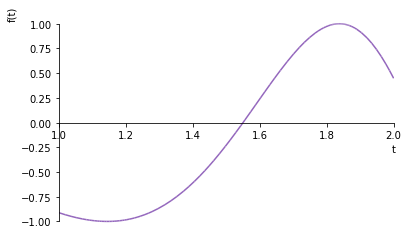

In [28]:
plot(f2, (t, 1, 2), axis_center=(1,0), line_color='tab:purple')

Найдём минимум функции $f(t)$ на отрезке $[1,\;2]$.

In [29]:
fib(f2, eps, a0=1, b0=2)

1.1447286188164028

Найдём максимум (минимум $-f(t)$) функции $f(t)$ на отрезке $[1,\;2]$.

In [30]:
fib(-f2, eps, a0=1, b0=2)

1.8378755829046685

Если верить Wolfram Mathematica, это верно.